## e005 EDA
 * train vs test

In [1]:
import pandas as pd
import numpy as np
import gc
import pyarrow.parquet as pq
from multiprocessing import Pool
from tqdm import tqdm_notebook as tqdm

import scipy
from scipy import signal
from scipy.signal import butter

from matplotlib import pyplot as plt
import seaborn as sns

import sys
sys.path.append('../../guchio_utils/')

In [2]:
#plt.rcParams['font.family'] = 'IPAPGothic' #全体のフォントを設定
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:95% !important; }</style>"))
%config InlineBackend.figure_formats = {'png', 'retina'}
%load_ext autoreload
%autoreload 1

In [38]:
#trn_df = pd.read_parquet('../inputs/origin/train.parquet.zip', compression='zip')
trn_df = pq.read_pandas('../inputs/origin/train.parquet').to_pandas()
# trn_meta_df = pd.read_csv('../inputs/origin/metadata_train.csv')

In [3]:
def load_features(features, base_dir, logger=None):
    loaded_features = []
    for feature in tqdm(features):
        load_filename = base_dir + feature + '.pkl.gz'
        loaded_feature = pd.read_pickle(load_filename, compression='gzip')
        loaded_features.append(loaded_feature)

    features_df = pd.concat(loaded_features, axis=1)
    return features_df

In [19]:
features = [
'e001_base_max',
'e002_hp_basic_max',
'e002_hp_basic_std',
'e002_hp_dn_basic_min',
'e003_hp_dn_3_phase_basic_corr_1',
'phase',
'e001_base_min',
'e002_hp_basic_mean',
'e002_hp_dn_basic_max',
'e002_hp_dn_basic_std',
'e003_hp_dn_3_phase_basic_corr_2',
'signal_id',
'e001_base_std',
'e002_hp_basic_min',
'e003_hp_dn_3_phase_basic_corr_0',
'id_measurement',
]

tst_df = load_features(features, '../inputs/test/').sort_index(axis=1, ascending=False)
features += ['target']
trn_df = load_features(features, '../inputs/train/').sort_index(axis=1, ascending=False)

In [20]:
trn_df

,target,signal_id,phase,id_measurement,e003_hp_dn_3_phase_basic_corr_2,e003_hp_dn_3_phase_basic_corr_1,e003_hp_dn_3_phase_basic_corr_0,e002_hp_dn_basic_std,e002_hp_dn_basic_min,e002_hp_dn_basic_max,e002_hp_basic_std,e002_hp_basic_min,e002_hp_basic_mean,e002_hp_basic_max,e001_base_std,e001_base_min,e001_base_max
0,0,0,0,0,-0.820729,0.058750,1.000000,0.0,-33.343750,33.718750,0.0,-32.031250,-7.569790e-06,34.000000,13.870733,-39,33
1,0,1,1,0,0.010211,1.000000,0.058750,0.0,-16.046875,25.765625,0.0,-18.875000,-9.775162e-06,28.250000,13.037143,-30,26
2,0,2,2,0,1.000000,0.010211,-0.820729,0.0,-26.750000,22.093750,0.0,-23.296875,2.247095e-05,23.984375,13.684291,-28,39
3,1,3,0,1,-0.227416,0.480936,1.000000,0.0,-74.312500,54.500000,0.0,-74.187500,3.296137e-05,54.687500,13.673639,-77,52
4,1,4,1,1,0.267317,1.000000,0.480936,0.0,-24.562500,33.312500,0.0,-24.515625,4.589558e-05,32.468750,12.938380,-40,33
5,1,5,2,1,1.000000,0.267317,-0.227416,0.0,-42.593750,39.968750,0.0,-41.875000,4.744530e-05,40.125000,13.545785,-43,58
6,0,6,0,2,0.176534,-0.293100,1.000000,0.0,-32.781250,38.187500,0.0,-36.593750,-1.633167e-04,35.500000,14.064219,-49,55
7,0,7,1,2,0.413414,1.000000,-0.293100,0.0,-26.812500,16.015625,0.0,-28.859375,-1.533031e-04,19.359375,14.774433,-29,28
8,0,8,2,2,1.000000,0.413414,0.176534,0.0,-18.328125,16.140625,0.0,-20.609375,-9.804964e-05,20.390625,14.815678,-39,31
9,0,9,0,3,-0.535570,0.055014,1.000000,0.0,-142.000000,143.875000,0.0,-140.750000,1.841784e-05,143.250000,15.704631,-128,127


In [21]:
tst_df

,signal_id,phase,id_measurement,e003_hp_dn_3_phase_basic_corr_2,e003_hp_dn_3_phase_basic_corr_1,e003_hp_dn_3_phase_basic_corr_0,e002_hp_dn_basic_std,e002_hp_dn_basic_min,e002_hp_dn_basic_max,e002_hp_basic_std,e002_hp_basic_min,e002_hp_basic_mean,e002_hp_basic_max,e001_base_std,e001_base_min,e001_base_max
0,8712,0,2904,0.316507,-0.161547,1.000000,0.0,-24.437500,28.093750,0.0,-24.609375,-0.000039,29.328125,13.805535,-46,28
1,8713,1,2904,0.380297,1.000000,-0.161547,0.0,-20.250000,12.101562,0.0,-20.500000,-0.000039,12.273438,13.972893,-25,30
2,8714,2,2904,1.000000,0.380297,0.316507,0.0,-23.296875,24.906250,0.0,-22.500000,-0.000015,25.812500,13.806489,-27,31
3,8715,0,2905,-0.323797,0.390967,1.000000,0.0,-6.464844,12.171875,0.0,-9.640625,0.000008,14.328125,14.098745,-29,28
4,8716,1,2905,0.226520,1.000000,0.390967,0.0,-8.890625,7.746094,0.0,-15.671875,0.000022,13.843750,13.573268,-35,29
5,8717,2,2905,1.000000,0.226520,-0.323797,0.0,-20.765625,8.156250,0.0,-21.890625,0.000015,10.335938,13.338581,-29,25
6,8718,0,2906,0.631462,0.864264,1.000000,0.0,-15.039062,9.218750,0.0,-15.773438,-0.000006,10.046875,14.281367,-30,29
7,8719,1,2906,0.674878,1.000000,0.864264,0.0,-21.828125,33.062500,0.0,-22.906250,0.000028,33.718750,15.906887,-44,35
8,8720,2,2906,1.000000,0.674878,0.631462,0.0,-16.437500,23.875000,0.0,-16.984375,-0.000012,23.078125,14.960632,-28,28
9,8721,0,2907,-0.838401,0.760852,1.000000,0.0,-26.875000,35.968750,0.0,-28.203125,-0.000021,38.843750,14.090346,-31,36


In [26]:
def plot_train_and_test_col_hist(train_df, test_df, col):
    fig, axs = plt.subplots(1, 2, figsize=(8, 4))
    _trn, _tst = train_df[col], test_df[col]
    if _trn.dtype == 'object':
        sns.countplot(_trn, ax=axs[0])
        sns.countplot(_tst, ax=axs[1])
    else:
        sns.distplot(_trn, kde=False, ax=axs[0])
        sns.distplot(_tst, kde=False, ax=axs[1])

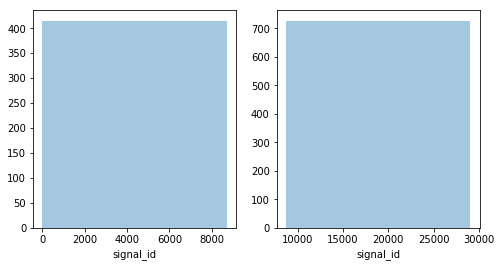

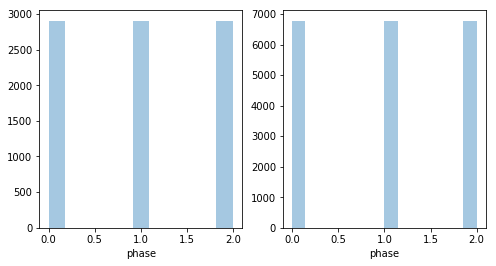

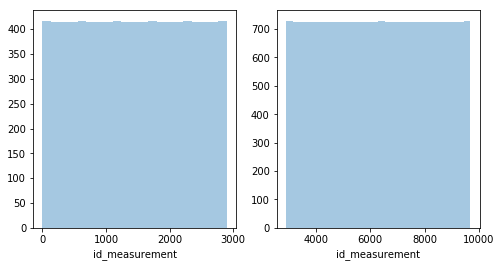

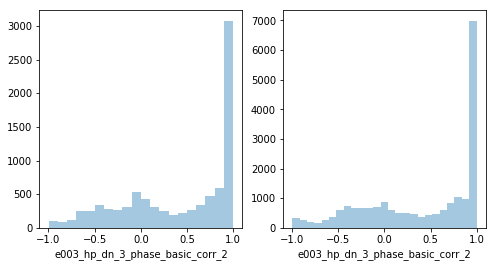

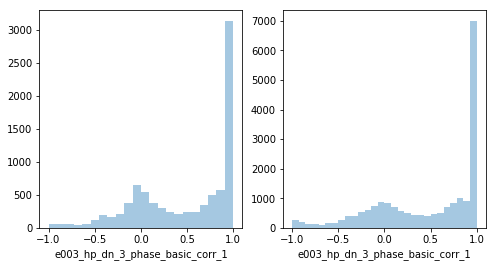

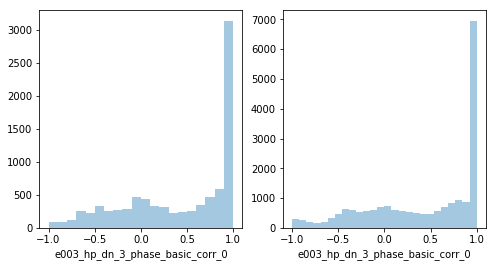

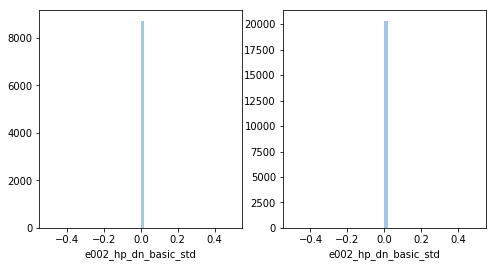

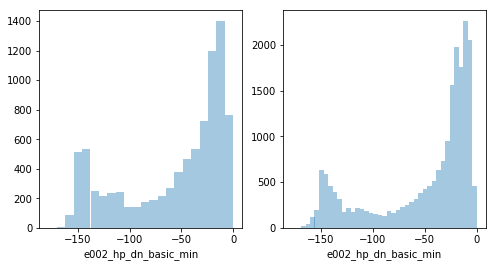

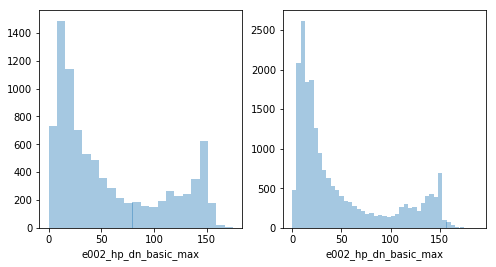

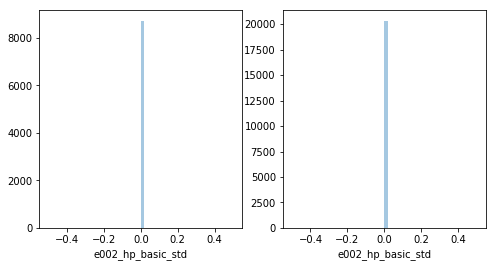

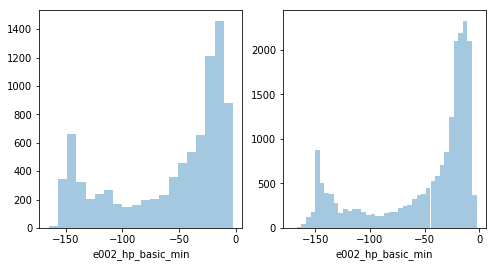

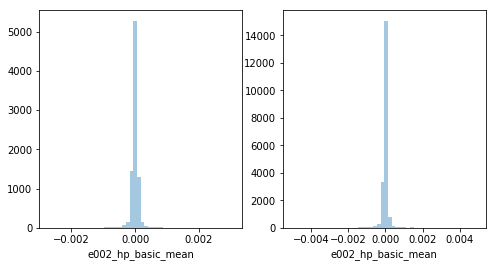

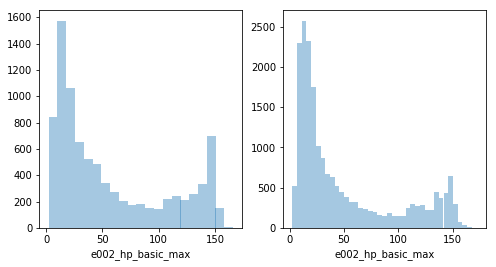

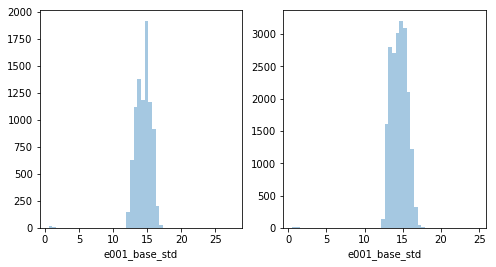

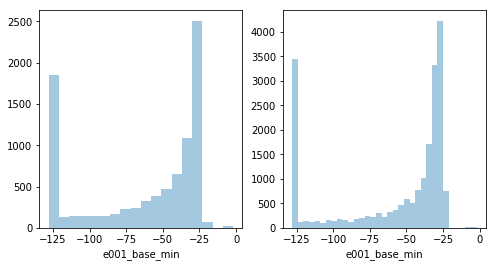

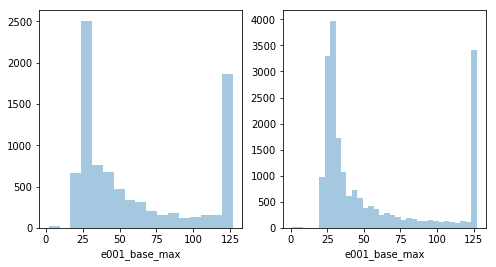

In [27]:
for col in tst_df.columns:
    plot_train_and_test_col_hist(trn_df, tst_df, col)

In [4]:
trn_hp_dn_df = pd.read_pickle('../inputs/prep/train_hp_dn.pkl.gz', compression='gzip')

In [6]:
trn_hp_dn_df.iloc[:, :10].std(axis=0)

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
6    0.0
7    0.0
8    0.0
9    0.0
dtype: float16

In [35]:
# trn_hp_dn_df.iloc[:, 0].plot()
np.std(trn_hp_dn_df.iloc[:3, :100])

0     2.000000
1     0.000000
2     2.078125
3     1.386719
4     0.626465
5     1.354492
6     1.202148
7     2.341797
8     0.000000
9     1.287109
10    0.643066
11    1.006836
12    0.001221
13    0.671875
14    1.325195
15    0.675293
16    1.739258
17    0.853027
18    2.048828
19    0.861328
20    1.299805
21    1.064453
22    0.211426
23    0.556152
24    1.577148
25    1.172852
26    0.920898
27    0.529297
28    0.395752
29    1.253906
        ...   
70    0.987305
71    1.989258
72    1.118164
73    1.592773
74    0.818359
75    0.226440
76    2.421875
77    0.103638
78    0.791504
79    1.054688
80    0.707031
81    1.302734
82    1.098633
83    0.721680
84    0.611328
85    0.663086
86    0.613770
87    1.043945
88    0.629883
89    0.747559
90    1.485352
91    0.194946
92    1.674805
93    1.108398
94    0.871582
95    0.606934
96    1.628906
97    2.091797
98    0.038666
99    1.445312
Length: 100, dtype: float16

In [37]:
trn_hp_dn_df.iloc[:, :100]

,0,1,2,3,4,5,6,7,8,9,...,90,91,92,93,94,95,96,97,98,99
0,13.601562,0.000906,-14.601562,-14.359375,-4.300781,17.921875,-8.484375,6.421875,-0.000802,-13.218750,...,13.031250,1.088867,-15.687500,8.789062,5.875000,-18.593750,13.851562,-14.593750,-0.502441,10.750000
1,16.234375,0.000906,-17.515625,-17.390625,-5.820312,21.062500,-9.898438,9.070312,-0.000802,-15.539062,...,16.640625,1.322266,-17.781250,10.500000,6.882812,-17.109375,16.187500,-17.718750,-0.549316,12.453125
2,11.335938,0.000906,-12.445312,-14.546875,-4.878906,18.562500,-11.429688,12.156250,-0.000802,-12.531250,...,14.437500,1.566406,-13.679688,7.820312,4.750000,-17.921875,12.218750,-12.640625,-0.597168,14.289062
3,12.453125,0.000906,-13.718750,-14.234375,-4.585938,18.843750,-12.609375,14.265625,-0.000802,-11.726562,...,14.367188,1.762695,-14.843750,8.335938,5.152344,-17.046875,13.265625,-14.062500,-0.638672,15.718750
4,17.343750,0.000906,-18.937500,-13.914062,-3.957031,19.437500,-13.406250,15.304688,-0.000802,-11.187500,...,14.242188,1.908203,-18.984375,10.679688,7.152344,-17.062500,17.437500,-19.515625,-0.672852,16.671875
5,18.375000,0.000906,-20.031250,-14.054688,-4.296875,18.796875,-14.039062,15.921875,-0.000802,-11.875000,...,13.914062,2.025391,-18.937500,10.562500,7.570312,-16.953125,18.359375,-20.687500,-0.703613,17.421875
6,17.296875,0.000906,-18.843750,-15.898438,-6.062500,18.078125,-14.375000,15.710938,-0.000802,-14.914062,...,14.367188,2.099609,-16.187500,8.898438,7.148438,-17.953125,17.453125,-19.500000,-0.728516,17.828125
7,17.312500,0.000906,-18.828125,-15.992188,-6.296875,17.390625,-14.664062,15.617188,-0.000802,-15.335938,...,14.070312,2.166016,-15.570312,8.562500,7.171875,-17.703125,17.484375,-19.515625,-0.751953,18.171875
8,17.531250,0.000906,-19.031250,-14.703125,-5.269531,16.843750,-14.914062,15.679688,-0.000802,-13.445312,...,13.273438,2.228516,-16.312500,9.117188,7.261719,-16.515625,17.687500,-19.734375,-0.773926,18.453125
9,16.953125,0.000906,-18.343750,-14.640625,-4.890625,17.015625,-14.882812,15.101562,-0.000803,-12.648438,...,13.406250,2.251953,-16.453125,9.406250,7.042969,-16.343750,17.203125,-19.015625,-0.790039,18.406250


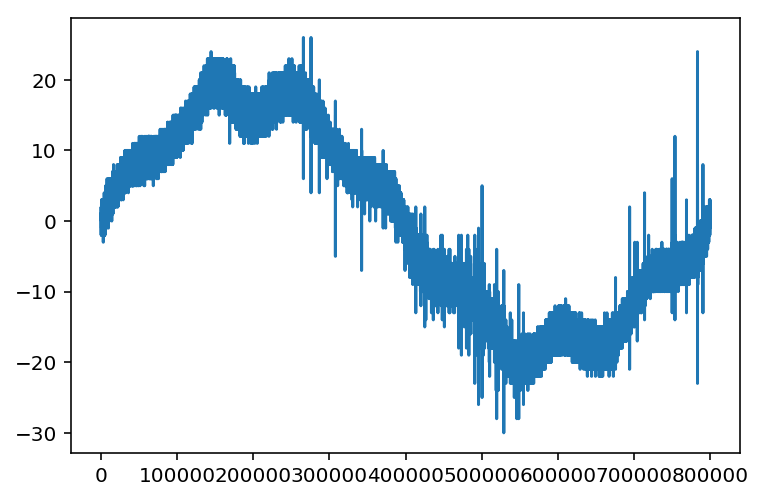

In [41]:
trn_df.iloc[:, 1].plot()

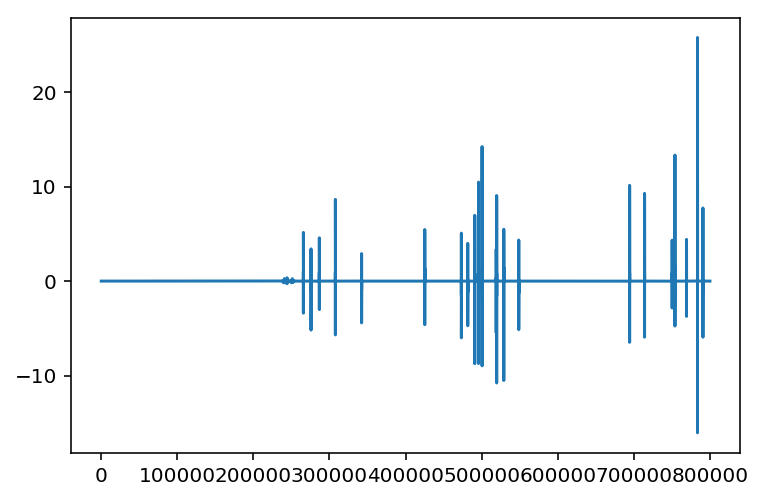

In [42]:
trn_hp_dn_df.iloc[:, 1].plot()

In [52]:
# a = trn_hp_dn_df.iloc[:, 1]
trn_hp_dn_df.iloc[:, :100].astype('float64').std(axis=0)

0     0.324641
1     0.084060
2     0.340512
3     0.486181
4     0.358436
5     0.551334
6     0.342781
7     0.338579
8     0.165785
9     2.943885
10    1.730224
11    2.536018
12    0.507153
13    0.480120
14    0.630164
15    0.147323
16    0.273829
17    0.184835
18    0.745909
19    0.574438
20    0.437424
21    1.517875
22    1.499116
23    1.154359
24    0.493789
25    0.416691
26    0.478305
27    0.495960
28    0.394269
29    0.502442
        ...   
70    0.665036
71    0.658789
72    0.704066
73    0.947593
74    0.867413
75    1.980032
76    1.335778
77    1.676200
78    1.485577
79    1.489258
80    1.156682
81    3.887001
82    1.958291
83    3.404588
84    1.312081
85    1.104897
86    0.875680
87    0.753323
88    0.937379
89    0.901791
90    1.334437
91    1.040051
92    0.759700
93    0.274293
94    0.274010
95    0.424064
96    0.531686
97    0.510097
98    0.246137
99    0.399162
Length: 100, dtype: float64